# Исследование рынка недвижимости 

</div>
<div class="alert alert-block alert-info">Приступаем к работе над проектом ,целью которого является изучение данных сервиса Яндекс Недвижимость. Необходимо детально рассмотреть  архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. Конечная задача- выполнение предобработки данных и выявление интересных явлений,  существующих на рынке недвижимости. Мы имеем базу квартир с большим количеством параметров, также в базе содержится два типа данных: добавленные пользователем и картографические.


In [1]:
import pandas as pd

try:
    data=pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
    data=pd.read_csv('/Users/tima2/OneDrive/Documents/real_estate_data.csv',sep='\t')
except FileNotFoundError:
    print('Запрашиваемый файл не найден')
data.head(5)

Запрашиваемый файл не найден


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


</div>
<div class="alert alert-block alert-info">Применила конструкцию try except для прописывания 2х путей

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В названиях столбцов есть несоответствие с общепринятым стилем .Поменяем заголовки некотовых столбцов.

In [3]:
data=data.rename(columns={'cityCenters_nearest':'city_centers_nearest','parks_around3000':'parks_around_3000','ponds_around3000':'ponds_around_3000'})

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around_3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around_3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]]

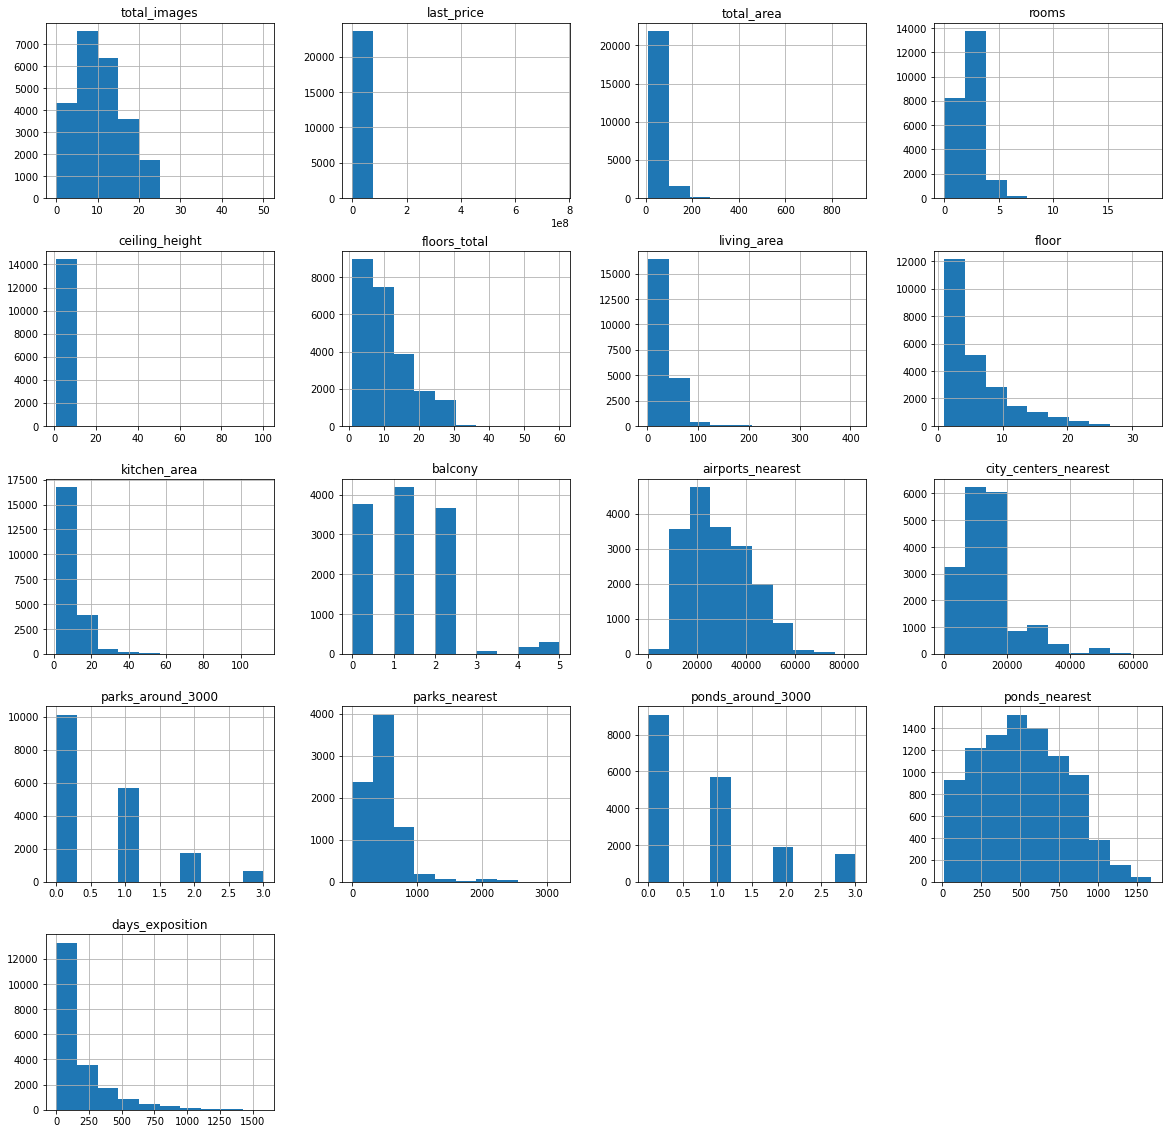

In [4]:
data.hist(figsize=(20,20))#Построем общую гистограмму по каждому столбцу таблицы



   
   Приступаем к предобработке

</div>


In [5]:
data.isna().sum()#Посмотрим количество пропущенных значений в каждом столбце

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
data['balcony']=data['balcony'].fillna(0)#если нет данных о балконе вероятнее его нет

In [7]:
#data['days_exposition']=data['days_exposition'].fillna(data['days_exposition'].mean())
#заполним средним значение количество дней публикации

In [8]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data['year']=data['first_day_exposition'].dt.year

In [9]:
data['days_exposition'].isna().groupby(data['year']).count()

year
2014     137
2015    1191
2016    2783
2017    8190
2018    8519
2019    2879
Name: days_exposition, dtype: int64

In [10]:
data['is_apartment']=data['is_apartment'].fillna('False')

In [11]:
data['parks_around_3000']=data['parks_around_3000'].fillna(0)#выяснить есть ли парки рядом невозможно заменим пропуски на 0

In [12]:
data['ponds_around_3000']=data['ponds_around_3000'].fillna(0)#выяснить есть ли пруды рядом невозможно заменим пропуски на 0

In [13]:
data['floors_total']=data['floors_total'].fillna(0)


In [14]:
data=data.dropna(subset=['locality_name'])#удалим строки с отсутсвующими названиями населенных пунктов 

In [15]:
data['parks_around_3000']=data['parks_around_3000'].fillna(0)
#если продавец не указал наличие парков рядом вероянее их там нет заменяем пропуски на 0

In [16]:
data['ponds_around_3000']=data['ponds_around_3000'].fillna(0)#если продавец не указал наличие прудов рядом вероянее их там нет 
#заменяем пропуски на 0

Причины появления пропусков бывают разные.К человеческому фактору относятся невнимательное заполнение информации.Например в столбцах balcony,airports_nearest,city_сenters_nearest,ceiling_height,living_area,kitchen_area(вряд ли владелец не знает такой информации о своем обьекте недвижимости)Судя по большому количеству пропусков в :parks_nearest,ponds_nearest видимо информацию могли вносить не только владельцы жилья но и агенты, которые не владели данной информацией.Пропуски в days_exposition возрастают по мере лет. Это означает что данные обькты недвижимоти не проданы и продажа не закрыта.Такие пропуски не надо корректировать так как это может повлиять на дальнейшие расчеты.Столбец is_apartment имеет самое большое количество пропущенных значений ,возможно изначально этого столбца не было вообще.Пропущенные значения в столбцах parks_around_3000,ponds_around_3000 вероятнее всего показывают отсутсвие данных обьектов рядом. 

In [17]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total                0
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around_3000           0
parks_nearest           15586
ponds_around_3000           0
ponds_nearest           14565
days_exposition          3180
year                        0
dtype: int64

Преобразование типов данных

In [18]:
data['balcony'] = data['balcony'].astype('int') # float64 поменяли на int64 количесво балконов должно быть целым
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d') #object поменяли на datetime
data['last_price'] = data['last_price'].astype('int')#float64 поменяли на int64 для удобства просмотра
data['is_apartment'] = data['is_apartment'].astype('bool')#object поменяли на bool ,булевое значение если соответствут условию выводит True,если нет False
data['parks_around_3000'] = data['parks_around_3000'].astype('int') #float64 поменяли на int64 количесво обьектов должно быть целым      
data['ponds_around_3000'] = data['ponds_around_3000'].astype('int')#float64 поменяли на int64 количесво обьектов должно быть целым
data['floors_total'] = data['floors_total'].astype('int')#float64 поменять на int64 количество этажей должно быть целым 

last_price              float64 поменяли на int64 для удобства просмотра,
first_day_exposition    object поменяли на datetime,
floors_total            float64 поменять на int64 количество этажей должно быть целым, 
is_apartment            object поменяли на bool ,булевое значение если соответствут условию выводит True,если нет False,
balcony                 float64 поменяли на int64 количесво балконов должно быть целым,
days_exposition         float64 поменяли на int64 количество дней должно быть целым,
parks_around3000        float64 поменяли на int64 количесво обьектов должно быть целым,
ponds_around3000        float64 поменяли на int64 количесво обьектов должно быть целым.

In [19]:
set(data['locality_name'].unique())#Выведем уникальные значения названий населенных пунктов в алфовитном порядке

{'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [20]:
#как мы видим в списке населенных пунктов много неявных дубликатов ,для удобства просмотра приведем названия к единому образцу
#Создаем цикл который заменит данные значения во всем столбце 
print('Количество уникальных названий до',data['locality_name'].nunique())
replace_name=['поселок городского типа', 'городской поселок', 'городской посёлок','коттеджный поселок', 'посёлок', 'посёлок при железнодорожной станции','поселок станции']
#список со значениями которые надо заменить 
for name in replace_name:
    data['locality_name']=data['locality_name'].str.replace(name,'поселок')



Количество уникальных названий до 364


In [21]:
set(data['locality_name'].unique())
print('Количество уникальных названий после',data['locality_name'].nunique())

Количество уникальных названий после 332


Столбец last_price- цена последнего обновления 

In [22]:
data['last_price'].min()# Минимальная цена недвижимости кажеться неправдоподобной 

12190

In [23]:
data[data['last_price'] <= 100000] #возьмем как минимальную допустимую цену жилья 100000 и проверим нет ли цен ниже данного уровня 
#выявлена строка с некорректно заполненным значением цены 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,year
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,True,...,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8.0,2019


In [24]:
data.groupby('rooms')['last_price'].median()#посмотрим примерные медианные цены в соответствии с количеством комнат 

rooms
0       2700000
1       3600000
2       4770169
3       6200000
4       9000000
5      14000000
6      19000000
7      24900000
8      23095000
9      23750000
10     23000000
11     25250000
12    420000000
14     26829500
15     65000000
16     28500000
19     32250000
Name: last_price, dtype: int64

In [25]:
data.loc[8793,'last_price']=1219000 #Скорpектируем данное значение 

In [26]:
data[data['last_price'] <= 100000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,year


Столбец ceiling_height-данные о высоте потолка 

In [27]:
data['ceiling_height'].describe()

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Явная ошибка в данных высота потолка не может быть 100,1.Среднее значение близко к реальности.

In [28]:
data['ceiling_height'].mean()

2.7712870945479646

In [29]:
data['ceiling_height'].median()

2.65

И медиальное и среднее значение высоты потолков близко к реальности ,но так как в данных имеются аномальные данные для дальнейших вычеслений возьмем медиану.

In [30]:
data[data['ceiling_height']>7]['ceiling_height'].sort_values().head(15)#получаем список маловероятных значений высоты потолка ,видим что в некоторых случаях явная опечатка а где-то просто не правильно проставлена "."

3474      8.0
17442     8.0
15743     8.0
5863      8.3
22309    10.3
15061    14.0
17496    20.0
20507    22.6
5076     24.0
355      25.0
18545    25.0
11285    25.0
14382    25.0
9379     25.0
6246     25.0
Name: ceiling_height, dtype: float64

In [31]:
data.loc[data['ceiling_height'] > 7,'ceiling_height']=data['ceiling_height'].median()  #заменяем аномальные данные медианным значением

In [32]:
data[data['ceiling_height']>7]['ceiling_height'].sort_values().head(15)

Series([], Name: ceiling_height, dtype: float64)

Столбец total_area-данные об общей площади

In [33]:
data['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Аномальных значений в данном столбце не выявлено.

Столбец 'rooms' количество комнат

In [34]:
data['rooms'].value_counts()

1     8036
2     7924
3     5797
4     1175
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

In [35]:
data['rooms'].describe()#в столбце есть значения 0

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [36]:
data[data['rooms']==0]['rooms'].count()#посчитаем количество таких квартир ,оно достотачно существенное

197

In [37]:
data.groupby('rooms')['total_area'].mean() #сгруппирум данные по количеству комнат со средней площадью,
#видим что вероятнее нулевое значение относиться к студиям,приравняем их к однокомнатным квартирам ,так как все таки комната там есть хоть и совмещенна с кухней 

rooms
0      29.279746
1      37.627459
2      55.842278
3      77.748020
4     107.681787
5     161.474816
6     201.537619
7     265.325424
8     259.233333
9     305.975000
10    259.566667
11    188.900000
12    900.000000
14    304.200000
15    590.000000
16    270.000000
19    374.600000
Name: total_area, dtype: float64

In [38]:
data.loc[data['rooms'] == 0,'rooms']=1

In [39]:
data[data['rooms']==0]['rooms'].count()

0

Столбец living_area -жилая площадь

In [40]:
data['living_area'].describe()

count    21752.000000
mean        34.448356
std         22.037664
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Минимальное значение неправдоподобно ,выясним есть ли еще такие аномальные значения .Так как жилая площадь – это суммарная величина жилых комнат,вероятно значение  меньше 5 метров невозможно даже для студии. 

In [41]:
data[data['living_area']<5]['living_area'].sort_values().head(15)

13915    2.0
21758    2.0
3242     3.0
23574    3.0
Name: living_area, dtype: float64

Таких значений не много не будем их трогать.Проверим правило при котором жилая площадь не может превышать общую.

In [42]:
data.loc[data['living_area']>data['total_area']]['living_area'].count()

0

Таких квартир нет.В данном столбце имеются пропуски заполним их средней площадью соответствующей количеству комнат.

In [43]:
data['living_area']=data['living_area'].fillna(data.groupby('rooms')['living_area'].mean())

Столбец kitchen_area -площадь кухни 

In [44]:
data['kitchen_area'].describe()

count    21381.000000
mean        10.566403
std          5.901753
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Минимальное значение явно не соответсвует действительности ,вряд ли существуют такие кухни.

In [45]:
data[data['kitchen_area']<5]['kitchen_area'].count()

105

Таких значений достаточно много заменим их на соответсвующие средние значения учитывая количество комнат

In [46]:
data.loc[data['kitchen_area']<5,'kitchen_area']=data.groupby('rooms')['kitchen_area'].mean()

Аналогично заполним пропуски в данном столбце

In [47]:
data['kitchen_area']=data['kitchen_area'].fillna(data.groupby('rooms')['kitchen_area'].mean())

Добавим новые столбцы в таблицу

In [48]:
data['price_one_meter']=data['last_price']/data['total_area']#цена одного квадратного метра
data['price_one_meter']=data['price_one_meter'].astype('int')#переводим значение в целочисленное число
data['day']=data['first_day_exposition'].dt.weekday#день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
data['month']=data['first_day_exposition'].dt.month#месяц публикации объявления;

# функция кoторая поможет нам создать столбец с типом этажа
def floors_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'


data['floor_type'] = data.apply(floors_type, axis=1)

data['city_centers_nearest_km']=round(data['city_centers_nearest']/1000)  #расстояние до центра города в километрах (переведем из м в км и округлите до целых значений)


Изучим параметры объектов:
общая площадь;
жилая площадь;
площадь кухни;
цена объекта;
количество комнат;
высота потолков;
этаж квартиры;
тип этажа квартиры («первый», «последний», «другой»);
общее количество этажей в доме;
расстояние до центра города в метрах;
расстояние до ближайшего аэропорта;
расстояние до ближайшего парка;
день и месяц публикации объявления.


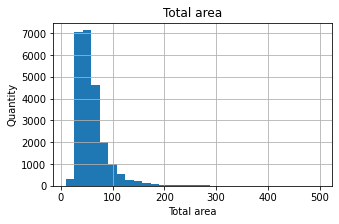

In [49]:
import matplotlib.pyplot as plt
data['total_area'].hist(bins=30, range=(10, 500),figsize=(5,3)).set(title='Total area', 
xlabel='Total area', ylabel='Quantity')

plt.show()


По общей площади- основную массу обьявлений представляют квартиры с площадью от 20 до 100 кв.метров.

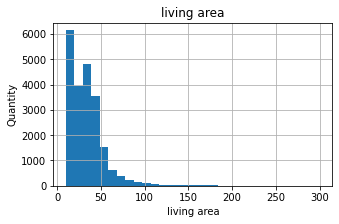

In [50]:
data['living_area'].hist(bins=30, range=(10, 300),figsize=(5,3)).set(title='living area', 
xlabel='living area', ylabel='Quantity')

plt.show()

Большинство квартир имеют жилую площадь от 20-60 кв.метров,квартиры с жилой площадью более 100 встречаются редко

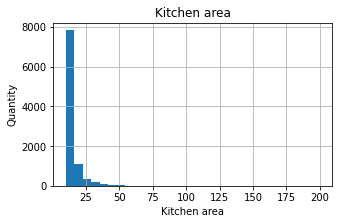

In [51]:
data['kitchen_area'].hist(bins=30, range=(10, 200),figsize=(5,3)).set(title='Kitchen area', 
xlabel='Kitchen area', ylabel='Quantity')

plt.show()

Самые распространенные варианты площади кухни от 5 до 20 кв.метров.Это мало, но можно предположить 
что большинство квартир предствленных в обьявлениях относяться к старому фонду.Квартир с кухнями более 50 кв.метров практически нет.

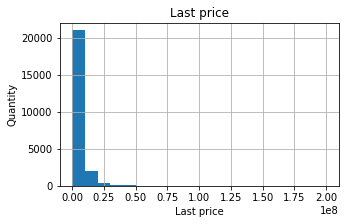

In [52]:
data['last_price'].hist(bins=20, range=(100000,200000000),figsize=(5,3)).set(title='Last price', 
xlabel='Last price', ylabel='Quantity')

plt.show()

В основном стоимость квартир около 5 млн

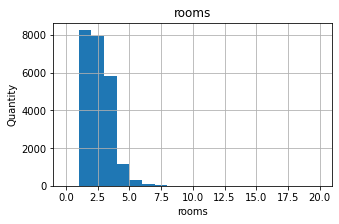

In [53]:
data['rooms'].hist(bins=20, range=(0, 20),figsize=(5,3)).set(title='rooms', 
xlabel='rooms', ylabel='Quantity')

plt.show()

Основная масса квартир имеет от 2-5 комнат,варианты с более 5 комнатами редки.

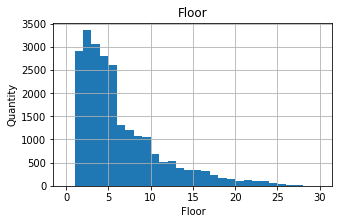

In [54]:
data['floor'].hist(bins=30, range=(0, 30),figsize=(5,3)).set(title='Floor', 
xlabel='Floor', ylabel='Quantity')

plt.show()

Самые распространненные этажи квартир находяться в диапазоне от 1-10.

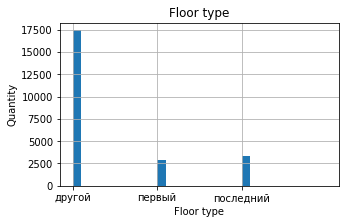

In [55]:
data['floor_type'].hist(bins=30, range=(0, 3),figsize=(5,3)).set(title='Floor type', 
xlabel='Floor type', ylabel='Quantity')

plt.show()

Как показывает гистограмма квартир с первым и последним этажом намного меньше квартир с другими этажами которые и сооставляют основное количество

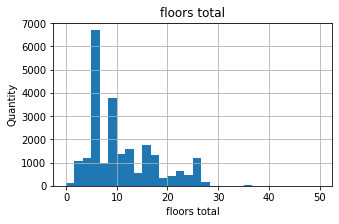

In [56]:
data['floors_total'].hist(bins=30, range=(0, 50),figsize=(5,3)).set(title='floors total', 
xlabel='floors total', ylabel='Quantity')

plt.show()

В обьявлениях в основном представленны квартиры в 5 и 9 ти этажных зданиях,что естественно для построек 1990-2000 годов,
меньне но все же достаточно часто встречаются дома менее 5 этажей и более 9.Здания с этажностью более 30 встречаються редко

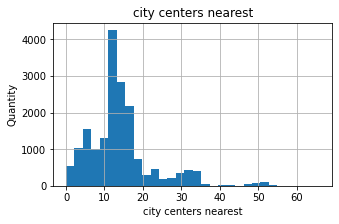

In [57]:
data['city_centers_nearest_km'].hist(bins=30,figsize=(5,3)).set(title='city centers nearest', 
xlabel='city centers nearest', ylabel='Quantity')

plt.show()

В основном расстояние до центра города состовляет от 10-20 км.

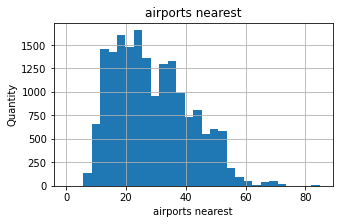

In [58]:
(data['airports_nearest']/1000).hist(bins=30,figsize=(5,3)).set(title='airports nearest', 
xlabel='airports nearest', ylabel='Quantity')

plt.show()

В основном расстояние до аэропорта состовляет от 10-55 км.

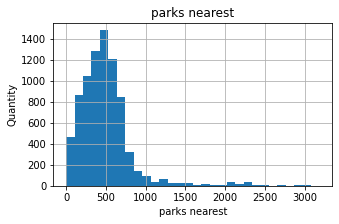

In [59]:
data['parks_nearest'].hist(bins=30,figsize=(5,3)).set(title='parks nearest', 
xlabel='parks nearest', ylabel='Quantity')

plt.show()

В основном расстояние до ближайшего парка состовляет до 1 км.В большинстве обьявлений парк достаточно близко на растоянии 500 метров.

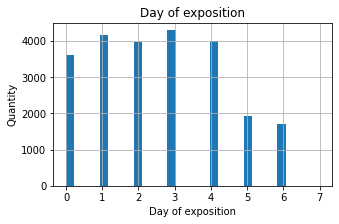

In [60]:
data['day'].hist(bins=30, range=(0, 7),figsize=(5,3)).set(title='Day of exposition', 
xlabel='Day of exposition', ylabel='Quantity')
plt.show()

Основная масса обьявлений выла опубликована в будние дни.На выходные активность продавцов видимо снижалась.

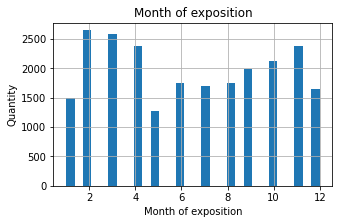

In [61]:
data['month'].hist(bins=30,figsize=(5,3)).set(title='Month of exposition', 
xlabel='Month of exposition', ylabel='Quantity')
plt.show()

По данным заметна выраженная активность продавцов с февраля по апрель,с сентября по ноябрь.Самая большая активность проявляется в феврале,марте.
Менее всего обьявлений было опубликовано в январе,мае и декабре

In [62]:
print('Среднее количество дней от публикации до продажи',data['days_exposition'].mean())
print('Медианное значение',data['days_exposition'].median())


Среднее количество дней от публикации до продажи 180.7531998045921
Медианное значение 95.0


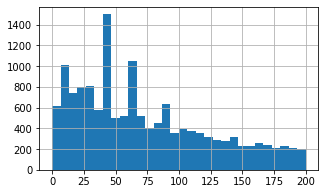

In [63]:
data['days_exposition'].hist(bins=30, range=(0, 200),figsize=(5,3))
plt.show()

Выявлены два выделяющихся пика -примерно на 45 и 60 день публикации и небольшой пик на 90й день.Возможно данные высокие показатели связаны с платным периодом публикации обьявлений либо данные периоды определены как стандартная длительность , по истечению которой, обьявления снимались с публикации автоматически.Данные выбросы желательно заменить на медианное значение.

In [64]:
data.loc[data['days_exposition']==45,'days_exposition'].count()

0

In [65]:
data.loc[data['days_exposition']==45,'days_exposition']=data['days_exposition'].mean()
data.loc[data['days_exposition']==60,'days_exposition']=data['days_exposition'].mean()

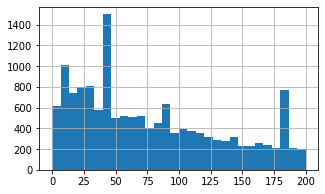

In [66]:
data['days_exposition'].hist(bins=30, range=(0, 200),figsize=(5,3))
plt.show()

Количество таких квартир проданных либо снятых с публикации достаточно велико.Возможно данный выброс связан с технической ошибкой.
Анализ показал что в среднем квартиры продаються за 180 дней,медианое значение 124 дня.По гистограмме видно ,что в основном обьявление активно до 100 дней.Быстрыми прдажами можно считать те которые оформлены за 50 дней ,долгими 200 дней. 


Попробуем выяснить , зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).


Корреляция : 0.6537509531847531


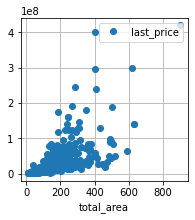

In [67]:
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(3, 3))
print('Корреляция :',data['total_area'].corr(data['last_price']))


Увеличение площади сопровождаеться увеличением цены,что подтверждает корреляция.


Корреляция : 0.5658713991730319


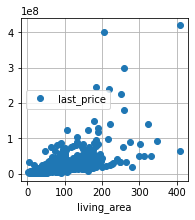

In [68]:
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(3, 3))
print('Корреляция :',data['living_area'].corr(data['last_price']))

Аналогичная ситуация с жилой площадью хотя зависимость цены ниже чем от общей площади

Корреляция : 0.5198253489341657


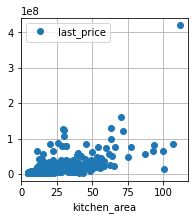

In [69]:
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(3, 3))
print('Корреляция :',data['kitchen_area'].corr(data['last_price']))

Еще меньше зависимость цены от площади кухни и рост цены намного плавнее.

Корреляция : 0.36529173265356346


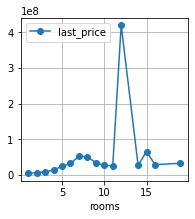

In [70]:
data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(3, 3))
print('Корреляция :',data['rooms'].corr(data['last_price']))

Зависимость цены от количества комнат есть но не сильная ,все-таки площадь влияет больше

<AxesSubplot:xlabel='floor_type'>

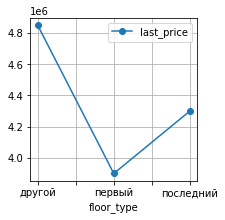

In [77]:
data.pivot_table(index='floor_type', values='last_price',aggfunc='median').plot(grid=True, style='o-', figsize=(3, 3))


Вывод: квартиры на первом этаже не столь популярны как на средних этажах соответсвенно и цена ниже

Корреляция : 0.0016053766504083272


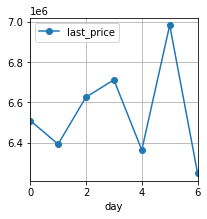

In [72]:
data.pivot_table(index='day', values='last_price').plot(grid=True, style='o-', xlim=(0,6), figsize=(3,3))
print('Корреляция :',data['day'].corr(data['last_price']))

Корреляция : 0.0027364737097843803


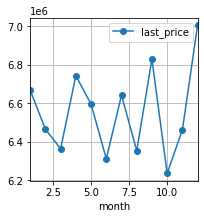

In [73]:
data.pivot_table(index='month', values='last_price').plot(grid=True, style='o-', xlim=(1,12), figsize=(3,3))
print('Корреляция :',data['month'].corr(data['last_price']))

Корреляция : -0.04291980493882523


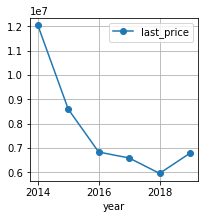

In [74]:
data.pivot_table(index='year', values='last_price').plot(grid=True, style='o-', figsize=(3,3))
print('Корреляция :',data['year'].corr(data['last_price']))

Корреляция показывает низкую зависимость цены от года публикации обьявления ,но график указывает на спад цен к 2018г. возможно это связано с ситуацией на рынке недвижимости.

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 

In [75]:
top_location=data['locality_name'].value_counts().sort_values(ascending=False).head(10)
print('10 населённых пунктов с наибольшим числом объявлений :')
print(top_location)
print('\n')
loc_mean_price=data.query('locality_name in @top_location.index').pivot_table(index='locality_name',values='price_one_meter')
loc_mean_price=loc_mean_price.astype('int')
 
print(loc_mean_price)
print('\n')
print('Стоимость за кв.метр max',loc_mean_price.max())

print('\n')
print('Стоимость за кв.метр min',loc_mean_price.min())
print

10 населённых пунктов с наибольшим числом объявлений :
Санкт-Петербург      15721
поселок Мурино         556
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64


                   price_one_meter
locality_name                     
Всеволожск                   68654
Выборг                       58141
Гатчина                      68745
Колпино                      75424
Пушкин                      103125
Санкт-Петербург             114849
деревня Кудрово              92473
поселок Мурино               85681
поселок Парголово            90175
поселок Шушары               78676


Стоимость за кв.метр max price_one_meter    114849
dtype: int64


Стоимость за кв.метр min price_one_meter    58141
dtype: int64


<function print>

<AxesSubplot:xlabel='city_centers_nearest_km', ylabel='mean_price_for_km'>

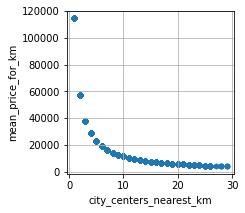

In [76]:
spb = data.query('locality_name == "Санкт-Петербург"') #Отбираем только квартиры в Санкт-Петербург
spb = spb.dropna(subset = ['city_centers_nearest'], inplace = False) #убираем пропуски
spb['city_enters_nearest_km'] = spb.loc[:, 'city_centers_nearest'] / 1000 #добавляем столбец с расстояние до центра
spb_mean_price_one_m = spb['price_one_meter'].mean() #Средняя цена за кв.метр
spb['mean_price_for_km']=spb_mean_price_one_m / spb['city_centers_nearest_km'] #средняя цена за каждый км

spb.plot(x='city_centers_nearest_km', y='mean_price_for_km', kind='scatter', figsize=(3, 3), grid=True)


Соответственно цена возрастает с приближением к центру.

**Общий вывод:**
Для анализа данные были взяты из сервиса Яндекс Недвижимость который содержит  архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
Поставленная задача— выполнить предобработку данных ,изучить их и  найти интересные особенности и зависимости параметров квартир на рынке недвижимости.
В процессе предобработки данных были выявлены явные и неявные пропуски, аномальные значения которые не соответствуют действительности. Возможно данные были взяты из разных источников и поэтому некоторые значения пропущены, также нельзя не предположить что человеческий фактор имел место быть, возможно некоторая информация не была заполнена продавцами. Работа с пропусками и аномальными значениями была проведена.
Также для удобства и дальнейшей работы были подкорректированы названия столбцов, изменены типы данных некоторых значений, добавлены новые колонки.
В предоставленных данных огромное разнообразие недвижимости, но исследование показало ,что в основном на рынке были выставлены квартиры с площадью в диапазоне от 20 до 100 кв.метров,среднее количество комнат 2-5.
Зависимость цены от других параметров есть ,самая большой показатель зависимости цены от общей площади.
Как ожидалось самое дорогое жилье в Санкт-Перербурге.
